In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy

from src import inception_v3_imagenet
from src import imagenet_labels
from src import utils
from src.diff_renderer import make_render_op

In [2]:
from src.utils import angles_to_matrix

In [3]:
%matplotlib inline

In [4]:
width, height = 1000, 1000
mesh = utils.load_obj('resources/dog.obj')
original_texture = mesh.texture_image.copy()
render_op = make_render_op(mesh, width, height)

In [51]:
trans = [0, 0, 2.6]
rotation = [0.4, np.pi+.7, 2.9]
fscale = 0.4
bgcolor = [0.9, 0.9, 0.9]
texture_image = mesh.texture_image

In [52]:
view_matrix = np.hstack((angles_to_matrix(rotation) , np.reshape(trans, (3, 1)) )) 
view_matrix

array([[ 0.74262977,  0.02322123,  0.66929949,  0.        ],
       [-0.18298798, -0.95433222,  0.23614703,  0.        ],
       [ 0.64421769, -0.29784358, -0.70446631,  2.6       ]])

In [53]:
view2_matrix = np.vstack((view_matrix, np.array([0, 0, 0, 1])))
view2_matrix

array([[ 0.74262977,  0.02322123,  0.66929949,  0.        ],
       [-0.18298798, -0.95433222,  0.23614703,  0.        ],
       [ 0.64421769, -0.29784358, -0.70446631,  2.6       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [57]:
pixel_center_offset = 0.5
near = 0.1
far = 100.

f = 0.5 * (fmat[0] + fmat[1])

center = [width/2.,height/2.]

right  =  (width-(center[0]+pixel_center_offset)) * (near/f)
left   =           -(center[0]+pixel_center_offset)  * (near/f)
top    = -(height-(center[1]+pixel_center_offset)) * (near/f)
bottom =            (center[1]+pixel_center_offset)  * (near/f)


A = (right + left) / (right - left)
B = (top + bottom) / (top - bottom)
C = (far + near) / (far - near)
D = (2 * far * near) / (far - near)

projMatrix = np.array([
    [2 * near / (right - left), 0, A, 0],
    [0, 2 * near / (top - bottom), B, 0],
    [0, 0, C, D],
    [0, 0, -1, 0]
])

In [58]:
homo_v = np.hstack((mesh.v, np.ones((mesh.v.shape[0], 1) )))
homo_v

array([[ 0.04729923, -0.02962504, -0.28196972,  1.        ],
       [ 0.03527478,  0.01396127, -0.29956182,  1.        ],
       [ 0.06153678,  0.01350783, -0.29312388,  1.        ],
       ..., 
       [ 0.04403177,  0.2615302 ,  0.38719011,  1.        ],
       [ 0.03651725,  0.24862289,  0.39145738,  1.        ],
       [ 0.03867221,  0.26496691,  0.38782987,  1.        ]])

In [59]:
# proj_matrix = camera_matrix.dot(view_matrix)
proj_matrix = projMatrix.dot(view2_matrix)

# unhomo(proj_matrix.dot(homo_v[0,:]))

In [60]:
abnormal = proj_matrix.dot(homo_v.reshape((-1, 4, 1)))[:, :, 0]
XY = (abnormal[:,:] / abnormal[3,:]).T
XY

array([[ 0.27282516, -0.0817528 , -1.07254638,  1.        ],
       [ 0.3084223 , -0.15895063, -1.07275418,  1.        ],
       [ 0.2651957 , -0.16326456, -1.07244255,  1.        ],
       ..., 
       [-0.65298731, -0.36386272, -1.08989744,  1.        ],
       [-0.64748836, -0.33217757, -1.09005218,  1.        ],
       [-0.64676643, -0.36937906, -1.09008799,  1.        ]])

(1, -1)

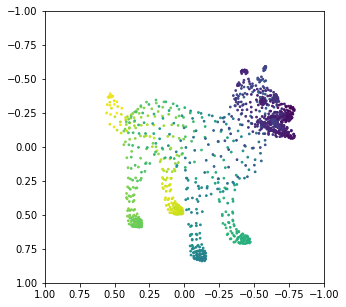

In [62]:

# plt.set_autoscale_on(False)
plt.figure(figsize=(5,5))
plt.scatter(XY[:,0], XY[:, 1], c = XY[:, 2], s=3)
# plt.axes().set_aspect('equal', 'datalim')

plt.xlim([1, -1])
plt.ylim([1, -1])

